In [2]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
import geopandas as gpd
import folium, fiona, branca

In [62]:
df2019=pd.read_json("../data/data2019.json")

In [2]:
df2020=pd.read_json("../data/data2020.json")

In [3]:
df2021=pd.read_json(open("../data/data2021.json","r",encoding="utf8"))

In [ ]:
df2022=pd.read_json("../data/data2022.json")

# ¿Qué tanto se vio afectado el proceso de contrataciones antes-durante-después de la pandemia?

In [3]:
df2019["mes"]=df2019["date"].dt.month
dfAwards2019=df2019["awards"].explode().reset_index()
dfAwards2019=dfAwards2019[dfAwards2019["awards"].notnull()]
dfAwards2019["value.amount"]=dfAwards2019["awards"].apply(lambda x: x.get("value"))
dfAwards2019=dfAwards2019[dfAwards2019["value.amount"].notnull()]
dfAwards2019["value.amount"]=dfAwards2019["value.amount"].apply(lambda x: x.get("amount"))
dfAwards2019.drop(columns=["awards"],inplace=True)
df2019["value.amount"]=dfAwards2019.groupby("index")["value.amount"].sum()
df2019Month=df2019.groupby("mes")["value.amount"].sum().reset_index()
df2019Month.to_csv("../output/df2019Month.csv")

In [5]:
df2020["mes"]=df2020["date"].dt.month
dfAwards2020=df2020["awards"].explode().reset_index()
dfAwards2020=dfAwards2020[dfAwards2020["awards"].notnull()]
dfAwards2020["value.amount"]=dfAwards2020["awards"].apply(lambda x: x.get("value"))
dfAwards2020=dfAwards2020[dfAwards2020["value.amount"].notnull()]
dfAwards2020["value.amount"]=dfAwards2020["value.amount"].apply(lambda x: x.get("amount"))
dfAwards2020.drop(columns=["awards"],inplace=True)
df2020["value.amount"]=dfAwards2020.groupby("index")["value.amount"].sum()
df2020Month=df2020.groupby("mes")["value.amount"].sum().reset_index()
df2020Month.to_csv("../output/df2020Month.csv")

In [3]:
df2021["mes"]=df2021["date"].dt.month
dfAwards2021=df2021["awards"].explode().reset_index()
dfAwards2021=dfAwards2021[dfAwards2021["awards"].notnull()]
dfAwards2021["value.amount"]=dfAwards2021["awards"].apply(lambda x: x.get("value"))
dfAwards2021=dfAwards2021[dfAwards2021["value.amount"].notnull()]
dfAwards2021["value.amount"]=dfAwards2021["value.amount"].apply(lambda x: x.get("amount"))
dfAwards2021.drop(columns=["awards"],inplace=True)
df2021["value.amount"]=dfAwards2021.groupby("index")["value.amount"].sum()
df2021Month=df2021.groupby("mes")["value.amount"].sum().reset_index()
df2021Month.to_csv("../output/df2021Month.csv")

In [8]:
df2022["mes"]=df2022["date"].dt.month
dfAwards2022=df2022["awards"].explode().reset_index()
dfAwards2022=dfAwards2022[dfAwards2022["awards"].notnull()]
dfAwards2022["value.amount"]=dfAwards2022["awards"].apply(lambda x: x.get("value"))
dfAwards2022=dfAwards2022[dfAwards2022["value.amount"].notnull()]
dfAwards2022["value.amount"]=dfAwards2022["value.amount"].apply(lambda x: x.get("amount"))
dfAwards2022.drop(columns=["awards"],inplace=True)
df2022["value.amount"]=dfAwards2022.groupby("index")["value.amount"].sum()
df2022Month=df2022.groupby("mes")["value.amount"].sum().reset_index()
df2022Month.to_csv("../output/df2022Month.csv")

In [3]:
df2019Month=pd.read_csv("../output/df2019Month.csv")
df2020Month=pd.read_csv("../output/df2020Month.csv")
df2021Month=pd.read_csv("../output/df2021Month.csv")
df2022Month=pd.read_csv("../output/df2022Month.csv")

Text(0, 0.5, 'Dinero por contrataciones')

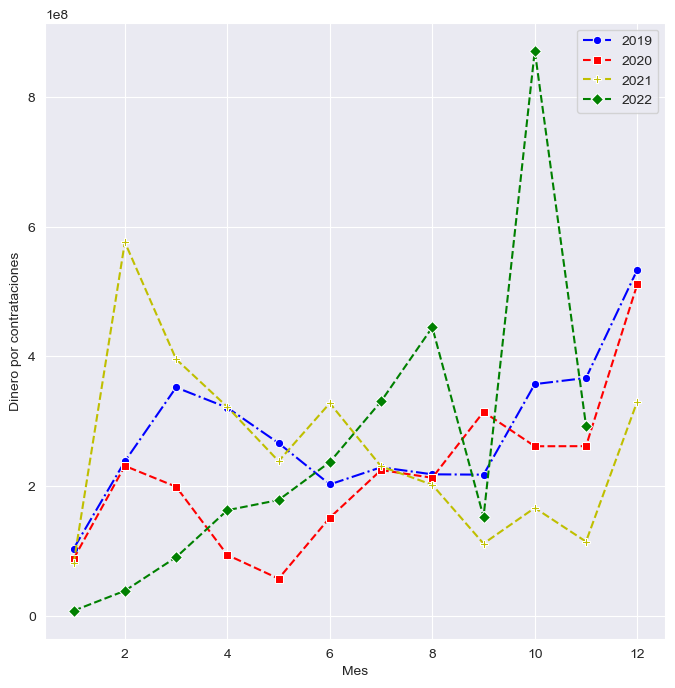

In [4]:
sbn.set_style("darkgrid")
fig,axs = plt.subplots(figsize=(8,8))
sbn.lineplot(data= df2019Month, x="mes", y = "value.amount", color="b",marker="o", linestyle="-.",ax=axs, label="2019")
sbn.lineplot(data= df2020Month, x="mes", y = "value.amount", color="r",marker="s", linestyle="--",ax=axs, label="2020")
sbn.lineplot(data= df2021Month, x="mes", y = "value.amount", color="y",marker="P", linestyle="--",ax=axs, label="2021")
sbn.lineplot(data= df2022Month, x="mes", y = "value.amount", color="g",marker="D", linestyle="--",ax=axs, label="2022")
axs.set_xlabel("Mes")
axs.set_ylabel("Dinero por contrataciones")

# ¿Cuales fueron los productos/servicios más pedidos por las contrataciones por mes antes-durante-después?

In [4]:
df2019["mes"]=df2019["date"].dt.month
df2019=df2019[df2019["awards"].notnull()]
df2019Awards=df2019["awards"].explode().reset_index()
df2019Awards["items"]=pd.json_normalize(df2019Awards["awards"])["items"]
df2019Items=df2019Awards["items"].explode().reset_index()
df2019Items["classification.id"]=pd.json_normalize(df2019Items["items"])["classification.id"]
df2019Items["classification.description"]=pd.json_normalize(df2019Items["items"])["classification.description"]
df2019Items.drop(columns=["items"],inplace=True)
df2019Awards=pd.merge(df2019Items, df2019Awards, left_on="index", right_index=True)
df2019Awards.drop(columns=["index","index_x","awards","items"],inplace=True)
df2019Final=pd.merge(df2019Awards,df2019["mes"],left_on="index_y",right_index=True)
df2019Final=df2019Final[df2019Final["classification.id"].notnull()]
df2019Final.drop(columns=["index_y"],inplace=True)
df2019Final.reset_index(drop=True,inplace=True)
df2019Count=df2019Final["classification.id"].value_counts()
df2019Final["classification.count"]=df2019Final["classification.id"].apply(lambda x:df2019Count[x])
df2019Count=df2019Count.reset_index().sort_values("classification.id",ascending=False)["index"].iloc[1:6].to_list()
df2019Final=df2019Final[df2019Final["classification.id"].isin(df2019Count)].reset_index(drop=True)
df2019Final.to_csv("../output/classificationCount2019.csv",index=False)

In [5]:
df2020["mes"]=df2020["date"].dt.month
df2020=df2020[df2020["awards"].notnull()]
df2020Awards=df2020["awards"].explode().reset_index()
df2020Awards["items"]=pd.json_normalize(df2020Awards["awards"])["items"]
df2020Items=df2020Awards["items"].explode().reset_index()
df2020Items["classification.id"]=pd.json_normalize(df2020Items["items"])["classification.id"]
df2020Items["classification.description"]=pd.json_normalize(df2020Items["items"])["classification.description"]
df2020Items.drop(columns=["items"],inplace=True)
df2020Awards=pd.merge(df2020Items, df2020Awards, left_on="index", right_index=True)
df2020Awards.drop(columns=["index","index_x","awards","items"],inplace=True)
df2020Final=pd.merge(df2020Awards,df2020["mes"],left_on="index_y",right_index=True)
df2020Final=df2020Final[df2020Final["classification.id"].notnull()]
df2020Final.drop(columns=["index_y"],inplace=True)
df2020Final.reset_index(drop=True,inplace=True)
df2020Count=df2020Final["classification.id"].value_counts()
df2020Final["classification.count"]=df2020Final["classification.id"].apply(lambda x:df2020Count[x])
df2020Count=df2020Count.reset_index().sort_values("classification.id",ascending=False)["index"].iloc[1:6].to_list()
df2020Final=df2020Final[df2020Final["classification.id"].isin(df2020Count)].reset_index(drop=True)
df2020Final.to_csv("../output/classificationCount2020.csv",index=False)

In [4]:
df2021["mes"]=df2021["date"].dt.month
df2021=df2021[df2021["awards"].notnull()]
df2021Awards=df2021["awards"].explode().reset_index()
df2021Awards["items"]=pd.json_normalize(df2021Awards["awards"])["items"]
df2021Items=df2021Awards["items"].explode().reset_index()
df2021Items["classification.id"]=pd.json_normalize(df2021Items["items"])["classification.id"]
df2021Items["classification.description"]=pd.json_normalize(df2021Items["items"])["classification.description"]
df2021Items.drop(columns=["items"],inplace=True)
df2021Awards=pd.merge(df2021Items, df2021Awards, left_on="index", right_index=True)
df2021Awards.drop(columns=["index","index_x","awards","items"],inplace=True)
df2021Final=pd.merge(df2021Awards,df2021["mes"],left_on="index_y",right_index=True)
df2021Final=df2021Final[df2021Final["classification.id"].notnull()]
df2021Final.drop(columns=["index_y"],inplace=True)
df2021Final.reset_index(drop=True,inplace=True)
df2021Count=df2021Final["classification.id"].value_counts()
df2021Final["classification.count"]=df2021Final["classification.id"].apply(lambda x:df2021Count[x])
df2021Count=df2021Count.reset_index().sort_values("classification.id",ascending=False)["index"].iloc[1:6].to_list()
df2021Final=df2021Final[df2021Final["classification.id"].isin(df2021Count)].reset_index(drop=True)
df2021Final.to_csv("../output/classificationCount2021.csv",index=False)

In [87]:
df2022["mes"]=df2022["date"].dt.month
df2022=df2022[df2022["awards"].notnull()]
df2022Awards=df2022["awards"].explode().reset_index()
df2022Awards["items"]=pd.json_normalize(df2022Awards["awards"])["items"]
df2022Items=df2022Awards["items"].explode().reset_index()
df2022Items["classification.id"]=pd.json_normalize(df2022Items["items"])["classification.id"]
df2022Items["classification.description"]=pd.json_normalize(df2022Items["items"])["classification.description"]
df2022Items.drop(columns=["items"],inplace=True)
df2022Awards=pd.merge(df2022Items, df2022Awards, left_on="index", right_index=True)
df2022Awards.drop(columns=["index","index_x","awards","items"],inplace=True)
df2022Final=pd.merge(df2022Awards,df2022["mes"],left_on="index_y",right_index=True)
df2022Final=df2022Final[df2022Final["classification.id"].notnull()]
df2022Final.drop(columns=["index_y"],inplace=True)
df2022Final.reset_index(drop=True,inplace=True)
df2022Count=df2022Final["classification.id"].value_counts()
df2022Final["classification.count"]=df2022Final["classification.id"].apply(lambda x:df2022Count[x])
df2022Count=df2022Count.reset_index().sort_values("classification.id",ascending=False)["index"].iloc[1:6].to_list()
df2022Final=df2022Final[df2022Final["classification.id"].isin(df2022Count)].reset_index(drop=True)
df2022Final.to_csv("../output/classificationCount2022.csv",index=False)

In [5]:
df2019Final=pd.read_csv("../output/classificationCount2019.csv")
df2019Final=df2019Final.groupby(["classification.id","mes"])["classification.id"].count().unstack(level=1)
df2020Final=pd.read_csv("../output/classificationCount2020.csv")
df2020Final=df2020Final.groupby(["classification.id","mes"])["classification.id"].count().unstack(level=1)
df2021Final=pd.read_csv("../output/classificationCount2021.csv")
df2021Final=df2021Final.groupby(["classification.id","mes"])["classification.id"].count().unstack(level=1)
df2022Final=pd.read_csv("../output/classificationCount2022.csv")
df2022Final=df2022Final.groupby(["classification.id","mes"])["classification.id"].count().unstack(level=1)

In [6]:
for i in range(5):
    q1=df2019Final.iloc[i].quantile(0.25)
    q3=df2019Final.iloc[i].quantile(0.75)
    iqr=q3-q1
    mean=int(df2019Final.iloc[i].mean())
    mask=np.abs((df2019Final.iloc[i] - df2019Final.iloc[i].mean()) / df2019Final.iloc[i].std())>3
    df2019Final.iloc[i,:] = np.where(mask, mean, df2019Final.iloc[i,:])

In [7]:
for i in range(5):
    q1=df2020Final.iloc[i].quantile(0.25)
    q3=df2020Final.iloc[i].quantile(0.75)
    iqr=q3-q1
    mean=int(df2020Final.iloc[i].mean())
    mask=np.abs((df2020Final.iloc[i] - df2020Final.iloc[i].mean()) / df2020Final.iloc[i].std())>3
    df2020Final.iloc[i,:] = np.where(mask, mean, df2020Final.iloc[i,:])

In [8]:
for i in range(5):
    q1=df2021Final.iloc[i].quantile(0.25)
    q3=df2021Final.iloc[i].quantile(0.75)
    iqr=q3-q1
    mean=int(df2021Final.iloc[i].mean())
    mask=np.abs((df2021Final.iloc[i] - df2021Final.iloc[i].mean()) / df2021Final.iloc[i].std())>3
    df2021Final.iloc[i,:] = np.where(mask, mean, df2021Final.iloc[i,:])

In [9]:
for i in range(5):
    q1=df2022Final.iloc[i].quantile(0.25)
    q3=df2022Final.iloc[i].quantile(0.75)
    iqr=q3-q1
    mean=int(df2022Final.iloc[i].mean())
    mask=np.abs((df2022Final.iloc[i] - df2022Final.iloc[i].mean()) / df2022Final.iloc[i].std())>3
    df2022Final.iloc[i,:] = np.where(mask, mean, df2022Final.iloc[i,:])

Text(636.5416666666666, 0.5, 'Producto/Servicio')

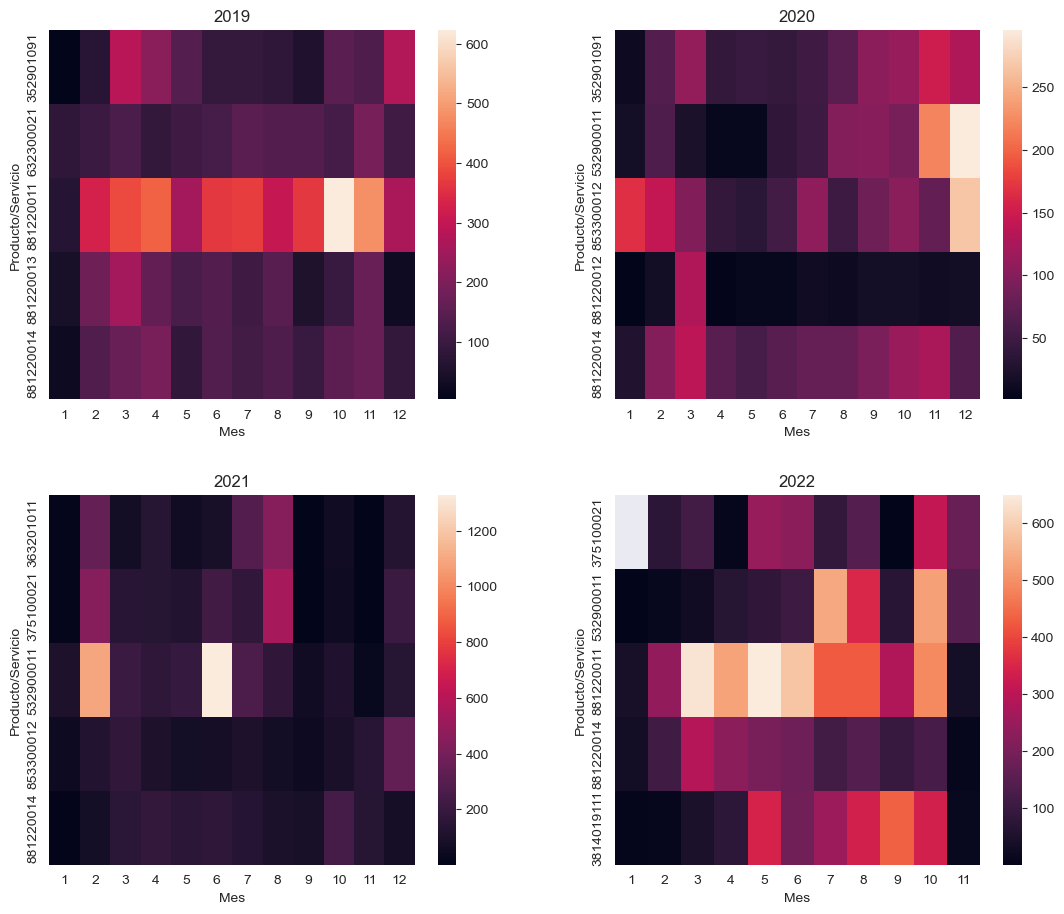

In [10]:
sbn.set_style("darkgrid")
fig,axs = plt.subplots(2,2,figsize=(12,10))
fig.tight_layout(pad=5.0)
sbn.heatmap(data=df2019Final,ax=axs[0,0])
sbn.heatmap(data=df2020Final,ax=axs[0,1])
sbn.heatmap(data=df2021Final,ax=axs[1,0])
sbn.heatmap(data=df2022Final,ax=axs[1,1])
axs[0,0].set_title("2019")
axs[0,0].set_xlabel("Mes")
axs[0,0].set_ylabel("Producto/Servicio")
axs[0,1].set_title("2020")
axs[0,1].set_xlabel("Mes")
axs[0,1].set_ylabel("Producto/Servicio")
axs[1,0].set_title("2021")
axs[1,0].set_xlabel("Mes")
axs[1,0].set_ylabel("Producto/Servicio")
axs[1,1].set_title("2022")
axs[1,1].set_xlabel("Mes")
axs[1,1].set_ylabel("Producto/Servicio")

# ¿Cuál es la provincia más influencial en el proceso de contrataciones y cuál fue mayormente afectada por la pandemia?

In [3]:
prov=gpd.read_file("../data/ecuador.geojson")
prov=prov.loc[:,["dpa_despro","geometry"]]

In [67]:
resume2019=pd.read_csv("../data/resumeData2019.csv")
resume2019=resume2019["region"].value_counts().reset_index()
geoDf2019=prov.merge(resume2019,right_on="index",left_on="dpa_despro").drop(columns=["index"]).rename(columns={"region":"count"})
geoDf2019=gpd.GeoDataFrame(geoDf2019,geometry=geoDf2019["geometry"])
geoDf2019.to_file("../output/geoDf2019.geojson",driver="GeoJSON")

In [68]:
resume2020=pd.read_csv("../data/resumeData2020.csv")
resume2020=resume2020["region"].value_counts().reset_index()
geoDf2020=prov.merge(resume2020,right_on="index",left_on="dpa_despro").drop(columns=["index"]).rename(columns={"region":"count"})
geoDf2020=gpd.GeoDataFrame(geoDf2020,geometry=geoDf2020["geometry"])
geoDf2020.to_file("../output/geoDf2020.geojson",driver="GeoJSON")

In [69]:
resume2021=pd.read_csv("../data/resumeData2021.csv")
resume2021=resume2021["region"].value_counts().reset_index()
geoDf2021=prov.merge(resume2021,right_on="index",left_on="dpa_despro").drop(columns=["index"]).rename(columns={"region":"count"})
geoDf2021=gpd.GeoDataFrame(geoDf2021,geometry=geoDf2021["geometry"])
geoDf2021.to_file("../output/geoDf2021.geojson",driver="GeoJSON")

In [70]:
resume2022=pd.read_csv("../data/resumeData2022.csv")
resume2022=resume2022["region"].value_counts().reset_index()
geoDf2022=prov.merge(resume2022,right_on="index",left_on="dpa_despro").drop(columns=["index"]).rename(columns={"region":"count"})
geoDf2022=gpd.GeoDataFrame(geoDf2022,geometry=geoDf2022["geometry"])
geoDf2022.to_file("../output/geoDf2022.geojson",driver="GeoJSON")

In [37]:
centroid=geoDf2019.geometry.centroid
mapbox_api_key = r"pk.eyJ1Ijoic3RhbWVuIiwiYSI6IlpkZEtuS1EifQ.jiH_c9ShtBwtqH9RdG40mw"; tileset_ID_str = "streets-v11"; tilesize_pixels = "256";
m=folium.Map(location=[centroid.y.mean(), centroid.x.mean()], zoom_start=7,
             tiles = f"https://api.mapbox.com/styles/v1/mapbox/{tileset_ID_str}/tiles/{tilesize_pixels}/{{z}}/{{x}}/{{y}}@2x?access_token={mapbox_api_key}",
             attr='MAPBOX')
field = "count"
label = "count"
colormap = branca.colormap.linear.YlOrBr_04.to_step(6).scale(geoDf2019[field].min(),geoDf2019[field].max())
colormap.caption = label
layer = folium.GeoJson('../output/geoDf2019.geojson',
        name=label,
        style_function=lambda x: {"weight":2, 'color':'black','fillColor':colormap(x['properties'][field]), 'fillOpacity':1},
        highlight_function=lambda x: {'weight':5, 'color':'black'},
        smooth_factor=2.0,
        tooltip=folium.features.GeoJsonTooltip(fields=['dpa_despro',field],
                                      aliases=['dpa_despro',label], 
                                      labels=True, 
                                      sticky=True,
                                      localize=True
                                     ),
        show = True,
        overlay = True
        )
m.add_child(layer)
m.add_child(colormap)

C:\Users\Franklin\AppData\Local\Temp\ipykernel_11372\471849558.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid=geoDf2019.geometry.centroid


In [38]:
centroid=geoDf2020.geometry.centroid
mapbox_api_key = r"pk.eyJ1Ijoic3RhbWVuIiwiYSI6IlpkZEtuS1EifQ.jiH_c9ShtBwtqH9RdG40mw"; tileset_ID_str = "streets-v11"; tilesize_pixels = "256";
m=folium.Map(location=[centroid.y.mean(), centroid.x.mean()], zoom_start=7,
             tiles = f"https://api.mapbox.com/styles/v1/mapbox/{tileset_ID_str}/tiles/{tilesize_pixels}/{{z}}/{{x}}/{{y}}@2x?access_token={mapbox_api_key}",
             attr='MAPBOX')
field = "count"
label = "count"
colormap = branca.colormap.linear.YlOrBr_04.to_step(6).scale(geoDf2020[field].min(),geoDf2020[field].max())
colormap.caption = label
layer = folium.GeoJson('../output/geoDf2020.geojson',
        name=label,
        style_function=lambda x: {"weight":2, 'color':'black','fillColor':colormap(x['properties'][field]), 'fillOpacity':1},
        highlight_function=lambda x: {'weight':5, 'color':'black'},
        smooth_factor=2.0,
        tooltip=folium.features.GeoJsonTooltip(fields=['dpa_despro',field],
                                      aliases=['dpa_despro',label], 
                                      labels=True, 
                                      sticky=True,
                                      localize=True
                                     ),
        show = True,
        overlay = True
        )
m.add_child(layer)
m.add_child(colormap)

C:\Users\Franklin\AppData\Local\Temp\ipykernel_11372\3414556596.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid=geoDf2020.geometry.centroid


In [39]:
centroid=geoDf2021.geometry.centroid
mapbox_api_key = r"pk.eyJ1Ijoic3RhbWVuIiwiYSI6IlpkZEtuS1EifQ.jiH_c9ShtBwtqH9RdG40mw"; tileset_ID_str = "streets-v11"; tilesize_pixels = "256";
m=folium.Map(location=[centroid.y.mean(), centroid.x.mean()], zoom_start=7,
             tiles = f"https://api.mapbox.com/styles/v1/mapbox/{tileset_ID_str}/tiles/{tilesize_pixels}/{{z}}/{{x}}/{{y}}@2x?access_token={mapbox_api_key}",
             attr='MAPBOX')
field = "count"
label = "count"
colormap = branca.colormap.linear.YlOrBr_04.to_step(6).scale(geoDf2021[field].min(),geoDf2021[field].max())
colormap.caption = label
layer = folium.GeoJson('../output/geoDf2021.geojson',
        name=label,
        style_function=lambda x: {"weight":2, 'color':'black','fillColor':colormap(x['properties'][field]), 'fillOpacity':1},
        highlight_function=lambda x: {'weight':5, 'color':'black'},
        smooth_factor=2.0,
        tooltip=folium.features.GeoJsonTooltip(fields=['dpa_despro',field],
                                      aliases=['dpa_despro',label], 
                                      labels=True, 
                                      sticky=True,
                                      localize=True
                                     ),
        show = True,
        overlay = True
        )
m.add_child(layer)
m.add_child(colormap)

C:\Users\Franklin\AppData\Local\Temp\ipykernel_11372\1897543553.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid=geoDf2021.geometry.centroid


In [40]:
centroid=geoDf2022.geometry.centroid
mapbox_api_key = r"pk.eyJ1Ijoic3RhbWVuIiwiYSI6IlpkZEtuS1EifQ.jiH_c9ShtBwtqH9RdG40mw"; tileset_ID_str = "streets-v11"; tilesize_pixels = "256";
m=folium.Map(location=[centroid.y.mean(), centroid.x.mean()], zoom_start=7,
             tiles = f"https://api.mapbox.com/styles/v1/mapbox/{tileset_ID_str}/tiles/{tilesize_pixels}/{{z}}/{{x}}/{{y}}@2x?access_token={mapbox_api_key}",
             attr='MAPBOX')
field = "count"
label = "count"
colormap = branca.colormap.linear.YlOrBr_04.to_step(6).scale(geoDf2022[field].min(),geoDf2022[field].max())
colormap.caption = label
layer = folium.GeoJson('../output/geoDf2022.geojson',
        name=label,
        style_function=lambda x: {"weight":2, 'color':'black','fillColor':colormap(x['properties'][field]), 'fillOpacity':1},
        highlight_function=lambda x: {'weight':5, 'color':'black'},
        smooth_factor=2.0,
        tooltip=folium.features.GeoJsonTooltip(fields=['dpa_despro',field],
                                      aliases=['dpa_despro',label], 
                                      labels=True, 
                                      sticky=True,
                                      localize=True
                                     ),
        show = True,
        overlay = True
        )
m.add_child(layer)
m.add_child(colormap)

C:\Users\Franklin\AppData\Local\Temp\ipykernel_11372\48017939.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid=geoDf2022.geometry.centroid


In [73]:
resume2019.sort_values(by="index",inplace=True)
resume2020.sort_values(by="index",inplace=True)
resume2021.sort_values(by="index",inplace=True)
resume2022.sort_values(by="index",inplace=True)
resume2019["index"][resume2019["index"]=="SANTO DOMINGO DE LOS TSACHILAS"]="ST. TSACHILAS"
resume2020["index"][resume2020["index"]=="SANTO DOMINGO DE LOS TSACHILAS"]="ST. TSACHILAS"
resume2021["index"][resume2021["index"]=="SANTO DOMINGO DE LOS TSACHILAS"]="ST. TSACHILAS"
resume2022["index"][resume2022["index"]=="SANTO DOMINGO DE LOS TSACHILAS"]="ST. TSACHILAS"

C:\Users\Franklin\AppData\Local\Temp\ipykernel_11372\3453583618.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resume2019["index"][resume2019["index"]=="SANTO DOMINGO DE LOS TSACHILAS"]="ST. TSACHILAS"
C:\Users\Franklin\AppData\Local\Temp\ipykernel_11372\3453583618.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resume2020["index"][resume2020["index"]=="SANTO DOMINGO DE LOS TSACHILAS"]="ST. TSACHILAS"
C:\Users\Franklin\AppData\Local\Temp\ipykernel_11372\3453583618.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

(0.0, 51188.0)

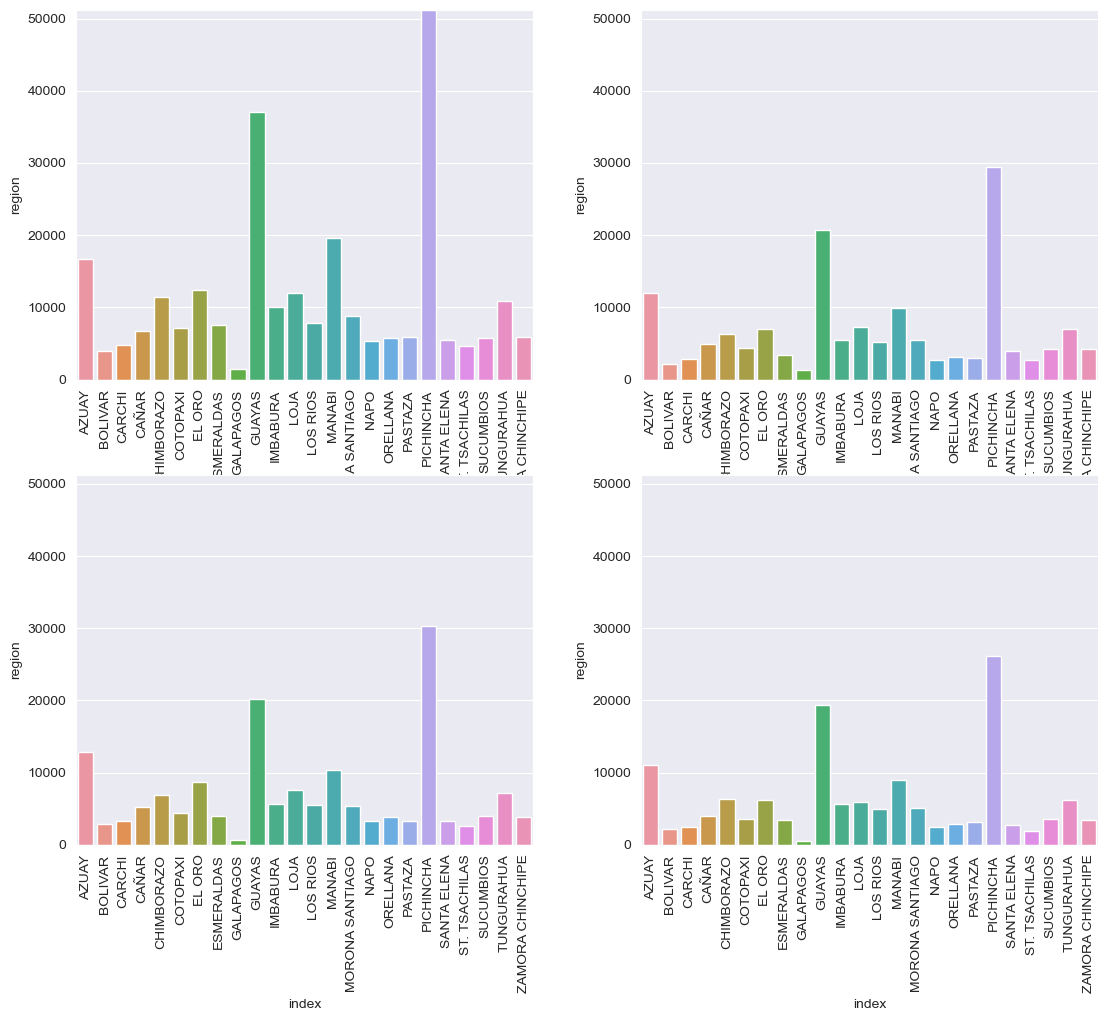

In [79]:
sbn.set_style("darkgrid")
fig,axs = plt.subplots(2,2,figsize=(12,10))
fig.tight_layout(pad=5.0)
sbn.barplot(resume2019,x="index",y="region",ax=axs[0,0])
sbn.barplot(resume2020,x="index",y="region",ax=axs[0,1])
sbn.barplot(resume2021,x="index",y="region",ax=axs[1,0])
sbn.barplot(resume2022,x="index",y="region",ax=axs[1,1])
_=plt.setp(axs[0,0].get_xticklabels(), rotation=90)
_=plt.setp(axs[0,1].get_xticklabels(), rotation=90)
_=plt.setp(axs[1,0].get_xticklabels(), rotation=90)
_=plt.setp(axs[1,1].get_xticklabels(), rotation=90)
axs[0,0].set_ylim(ymin=0, ymax=resume2019["region"].max())
axs[0,1].set_ylim(ymin=0, ymax=resume2019["region"].max())
axs[1,0].set_ylim(ymin=0, ymax=resume2019["region"].max())
axs[1,1].set_ylim(ymin=0, ymax=resume2019["region"].max())

# ¿Cuál es la empresa más influencial por tipo de contratación antes-durante-después de la pandemia?

In [63]:
df2019=df2019[df2019["awards"].notnull()]
df2019.reset_index(drop=True,inplace=True)
dfAwards2019=df2019["awards"].explode().reset_index()
dfAwards2019["suppliers"]=dfAwards2019["awards"].apply(lambda x: x.get("suppliers"))
dfAwards2019.drop(columns=["awards"],inplace=True)
dfSuppliers2019=dfAwards2019["suppliers"].explode().reset_index()
dfSuppliers2019["supplier"]=dfSuppliers2019["suppliers"].apply(lambda x: x.get("id"))
dfSuppliers2019.drop(columns=["suppliers"],inplace=True)
dfSuppliers2019=dfSuppliers2019.merge(dfAwards2019,left_on="index", right_index=True)
dfSuppliers2019.drop(columns=["index","index_x","suppliers"],inplace=True)
dfSuppliers2019=dfSuppliers2019.merge(df2019,left_on="index_y", right_index=True)
dfSuppliers2019=dfSuppliers2019.loc[:,["supplier","index_y","tender"]]
dfSuppliers2019["procurementMethod"]=dfSuppliers2019["tender"].apply(lambda x: x.get("procurementMethod"))
dfSupplierCount2019=dfSuppliers2019.groupby(["supplier","procurementMethod"])["supplier"].count().unstack(level=1)
dfSupplierCount2019.to_csv("../output/suppliers2019.csv")

In [4]:
df2020=df2020[df2020["awards"].notnull()]
df2020.reset_index(drop=True,inplace=True)
dfAwards2020=df2020["awards"].explode().reset_index()
dfAwards2020["suppliers"]=dfAwards2020["awards"].apply(lambda x: x.get("suppliers"))
dfAwards2020.drop(columns=["awards"],inplace=True)
dfSuppliers2020=dfAwards2020["suppliers"].explode().reset_index()
dfSuppliers2020["supplier"]=dfSuppliers2020["suppliers"].apply(lambda x: x.get("id"))
dfSuppliers2020.drop(columns=["suppliers"],inplace=True)
dfSuppliers2020=dfSuppliers2020.merge(dfAwards2020,left_on="index", right_index=True)
dfSuppliers2020.drop(columns=["index","index_x","suppliers"],inplace=True)
dfSuppliers2020=dfSuppliers2020.merge(df2020,left_on="index_y", right_index=True)
dfSuppliers2020=dfSuppliers2020.loc[:,["supplier","index_y","tender"]]
dfSuppliers2020["procurementMethod"]=dfSuppliers2020["tender"].apply(lambda x: x.get("procurementMethod"))
dfSupplierCount2020=dfSuppliers2020.groupby(["supplier","procurementMethod"])["supplier"].count().unstack(level=1)
dfSupplierCount2020.to_csv("../output/suppliers2020.csv")

In [5]:
df2021=df2021[df2021["awards"].notnull()]
df2021.reset_index(drop=True,inplace=True)
dfAwards2021=df2021["awards"].explode().reset_index()
dfAwards2021["suppliers"]=dfAwards2021["awards"].apply(lambda x: x.get("suppliers"))
dfAwards2021.drop(columns=["awards"],inplace=True)
dfSuppliers2021=dfAwards2021["suppliers"].explode().reset_index()
dfSuppliers2021["supplier"]=dfSuppliers2021["suppliers"].apply(lambda x: x.get("id"))
dfSuppliers2021.drop(columns=["suppliers"],inplace=True)
dfSuppliers2021=dfSuppliers2021.merge(dfAwards2021,left_on="index", right_index=True)
dfSuppliers2021.drop(columns=["index","index_x","suppliers"],inplace=True)
dfSuppliers2021=dfSuppliers2021.merge(df2021,left_on="index_y", right_index=True)
dfSuppliers2021=dfSuppliers2021.loc[:,["supplier","index_y","tender"]]
dfSuppliers2021["procurementMethod"]=dfSuppliers2021["tender"].apply(lambda x: x.get("procurementMethod"))
dfSupplierCount2021=dfSuppliers2021.groupby(["supplier","procurementMethod"])["supplier"].count().unstack(level=1)
dfSupplierCount2021.to_csv("../output/suppliers2021.csv")

In [3]:
df2022=df2022[df2022["awards"].notnull()]
df2022.reset_index(drop=True,inplace=True)
dfAwards2022=df2022["awards"].explode().reset_index()
dfAwards2022["suppliers"]=dfAwards2022["awards"].apply(lambda x: x.get("suppliers"))
dfAwards2022.drop(columns=["awards"],inplace=True)
dfSuppliers2022=dfAwards2022["suppliers"].explode().reset_index()
dfSuppliers2022["supplier"]=dfSuppliers2022["suppliers"].apply(lambda x: x.get("id"))
dfSuppliers2022.drop(columns=["suppliers"],inplace=True)
dfSuppliers2022=dfSuppliers2022.merge(dfAwards2022,left_on="index", right_index=True)
dfSuppliers2022.drop(columns=["index","index_x","suppliers"],inplace=True)
dfSuppliers2022=dfSuppliers2022.merge(df2022,left_on="index_y", right_index=True)
dfSuppliers2022=dfSuppliers2022.loc[:,["supplier","index_y","tender"]]
dfSuppliers2022["procurementMethod"]=dfSuppliers2022["tender"].apply(lambda x: x.get("procurementMethod"))
dfSupplierCount2022=dfSuppliers2022.groupby(["supplier","procurementMethod"])["supplier"].count().unstack(level=1)
dfSupplierCount2022.to_csv("../output/suppliers2022.csv")

In [26]:
dfSupplierCount2019=pd.read_csv("../output/suppliers2019.csv",index_col="supplier")
dfDirect2019=dfSupplierCount2019["direct"].dropna().sort_values(ascending=False).reset_index().iloc[:10,:].sort_values(by="supplier")
dfLimited2019=dfSupplierCount2019["limited"].dropna().sort_values(ascending=False).reset_index().iloc[:10,:].sort_values(by="supplier")
dfOpen2019=dfSupplierCount2019["open"].dropna().dropna().sort_values(ascending=False).reset_index().iloc[:10,:].sort_values(by="supplier")
dfSelective2019=dfSupplierCount2019["selective"].dropna().sort_values(ascending=False).reset_index().iloc[:10,:].sort_values(by="supplier")

In [27]:
dfSupplierCount2020=pd.read_csv("../output/suppliers2020.csv",index_col="supplier")
dfDirect2020=dfSupplierCount2020["direct"].dropna().sort_values(ascending=False).reset_index().iloc[:10,:].sort_values(by="supplier")
dfLimited2020=dfSupplierCount2020["limited"].dropna().sort_values(ascending=False).reset_index().iloc[:10,:].sort_values(by="supplier")
dfOpen2020=dfSupplierCount2020["open"].dropna().dropna().sort_values(ascending=False).reset_index().iloc[:10,:].sort_values(by="supplier")
dfSelective2020=dfSupplierCount2020["selective"].dropna().sort_values(ascending=False).reset_index().iloc[:10,:].sort_values(by="supplier")

In [28]:
dfSupplierCount2021=pd.read_csv("../output/suppliers2021.csv",index_col="supplier")
dfDirect2021=dfSupplierCount2021["direct"].dropna().sort_values(ascending=False).reset_index().iloc[:10,:].sort_values(by="supplier")
dfLimited2021=dfSupplierCount2021["limited"].dropna().sort_values(ascending=False).reset_index().iloc[:10,:].sort_values(by="supplier")
dfOpen2021=dfSupplierCount2021["open"].dropna().dropna().sort_values(ascending=False).reset_index().iloc[:10,:].sort_values(by="supplier")
dfSelective2021=dfSupplierCount2021["selective"].dropna().sort_values(ascending=False).reset_index().iloc[:10,:].sort_values(by="supplier")

In [29]:
dfSupplierCount2022=pd.read_csv("../output/suppliers2022.csv",index_col="supplier")
dfDirect2022=dfSupplierCount2022["direct"].dropna().sort_values(ascending=False).reset_index().iloc[:10,:].sort_values(by="supplier")
dfLimited2022=dfSupplierCount2022["limited"].dropna().sort_values(ascending=False).reset_index().iloc[:10,:].sort_values(by="supplier")
dfOpen2022=dfSupplierCount2022["open"].dropna().dropna().sort_values(ascending=False).reset_index().iloc[:10,:].sort_values(by="supplier")
dfSelective2022=dfSupplierCount2022["selective"].dropna().sort_values(ascending=False).reset_index().iloc[:10,:].sort_values(by="supplier")

In [46]:
dfDirect2019["year"]="2019"
dfDirect2020["year"]="2020"
dfDirect2021["year"]="2021"
dfDirect2022["year"]="2022"
dfDirect=pd.concat([dfDirect2019,dfDirect2020,dfDirect2021,dfDirect2022])

In [49]:
dfLimited2019["year"]="2019"
dfLimited2020["year"]="2020"
dfLimited2021["year"]="2021"
dfLimited2022["year"]="2022"
dfLimited=pd.concat([dfLimited2019,dfLimited2020,dfLimited2021,dfLimited2022])

In [54]:
dfOpen2019["year"]="2019"
dfOpen2020["year"]="2020"
dfOpen2021["year"]="2021"
dfOpen2022["year"]="2022"
dfOpen=pd.concat([dfOpen2019,dfOpen2020,dfOpen2021,dfOpen2022])

In [50]:
dfSelective2019["year"]="2019"
dfSelective2020["year"]="2020"
dfSelective2021["year"]="2021"
dfSelective2022["year"]="2022"
dfSelective=pd.concat([dfSelective2019,dfSelective2020,dfSelective2021,dfSelective2022])

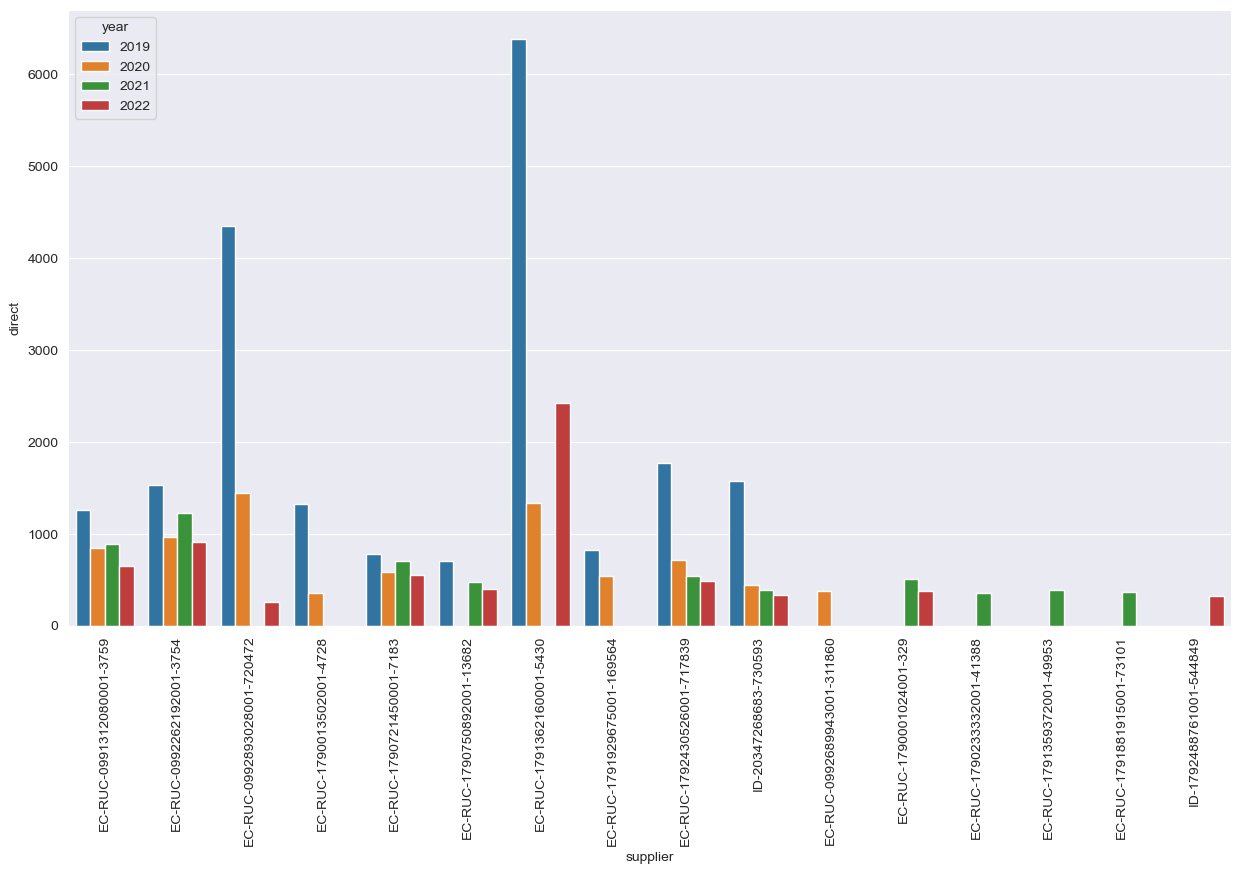

In [60]:
sbn.set_style("darkgrid")
fig,axs = plt.subplots(figsize=(15,8))
sbn.barplot(data= dfDirect, x="supplier", y = "direct", hue="year", ax= axs)
_=plt.setp(axs.get_xticklabels(), rotation=90)

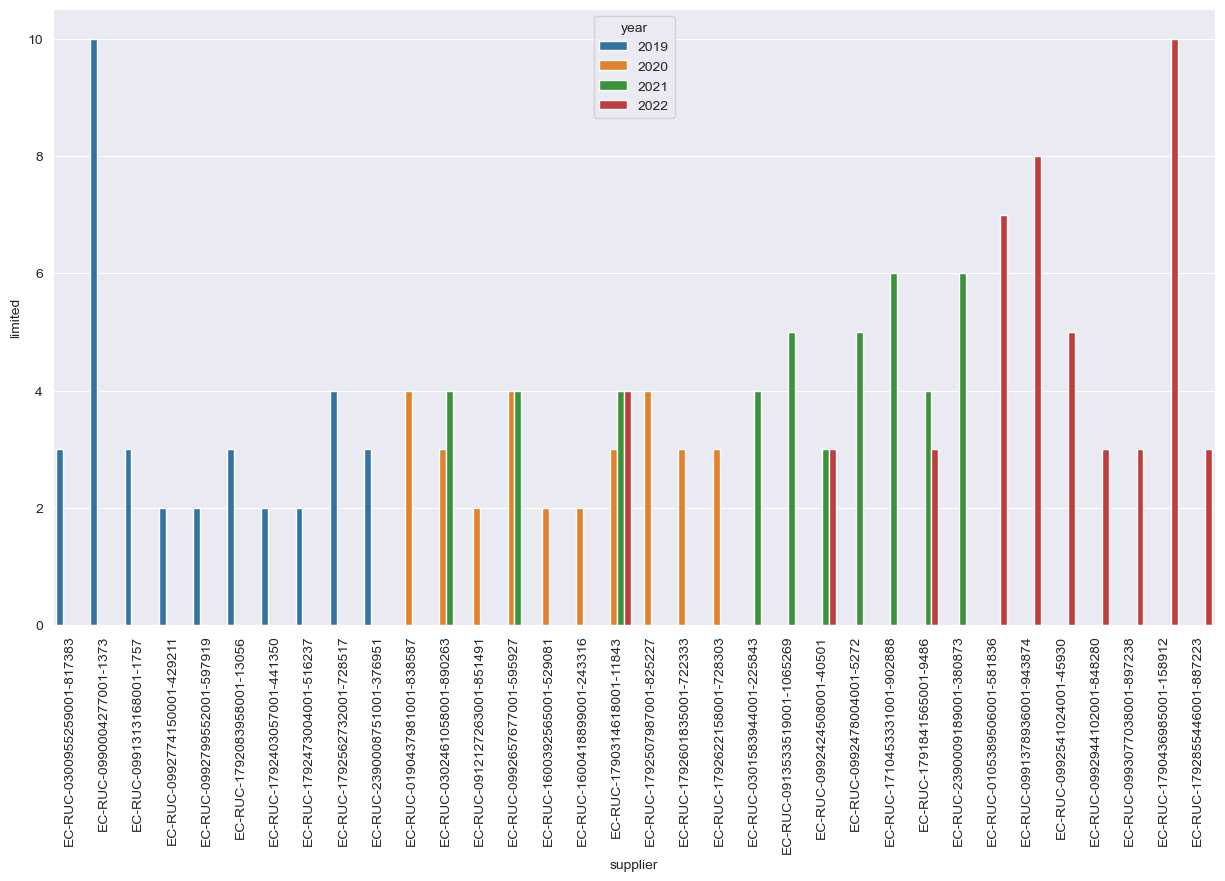

In [52]:
sbn.set_style("darkgrid")
fig,axs = plt.subplots(figsize=(15,8))
sbn.barplot(data= dfLimited, x="supplier", y = "limited", hue="year", ax= axs)
_=plt.setp(axs.get_xticklabels(), rotation=90)

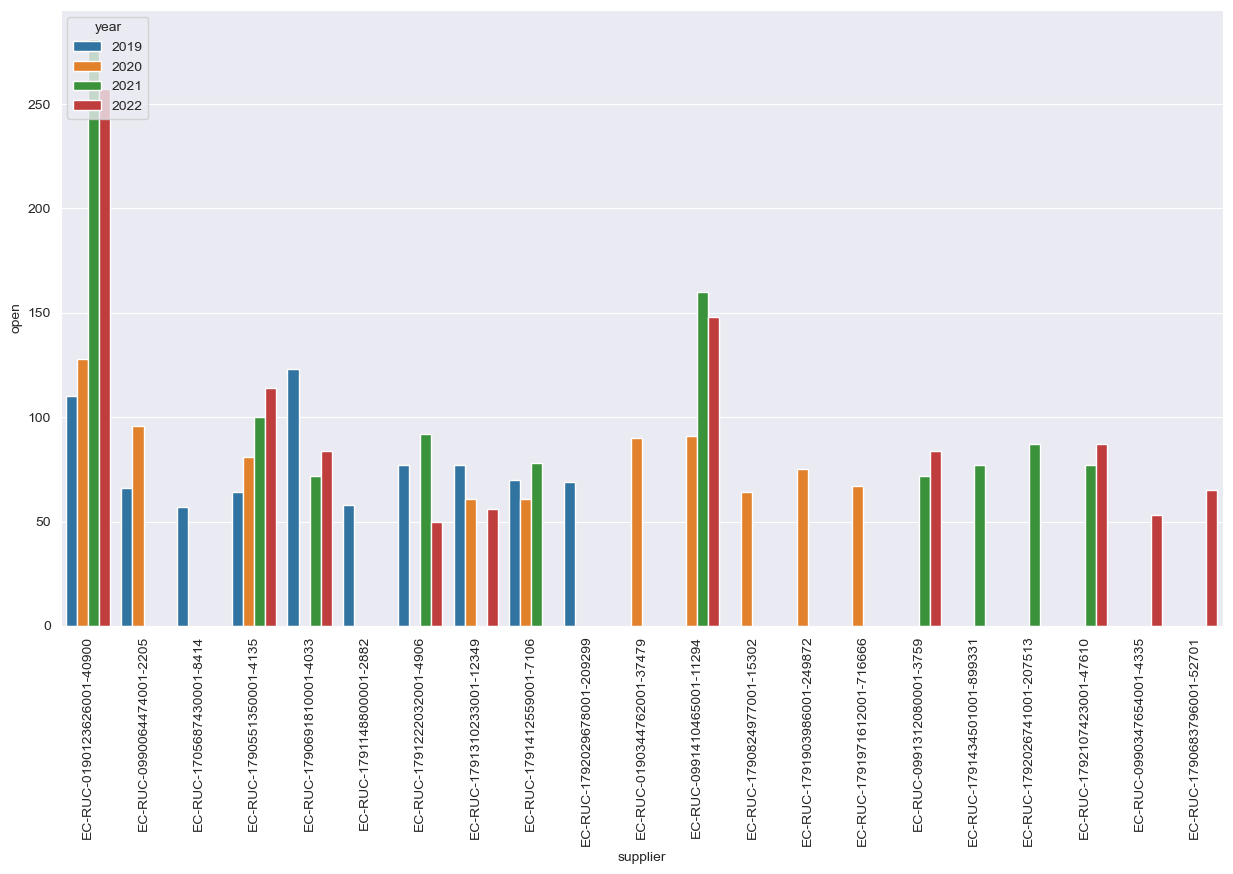

In [56]:
sbn.set_style("darkgrid")
fig,axs = plt.subplots(figsize=(15,8))
sbn.barplot(data= dfOpen, x="supplier", y = "open", hue="year", ax= axs)
_=plt.setp(axs.get_xticklabels(), rotation=90)

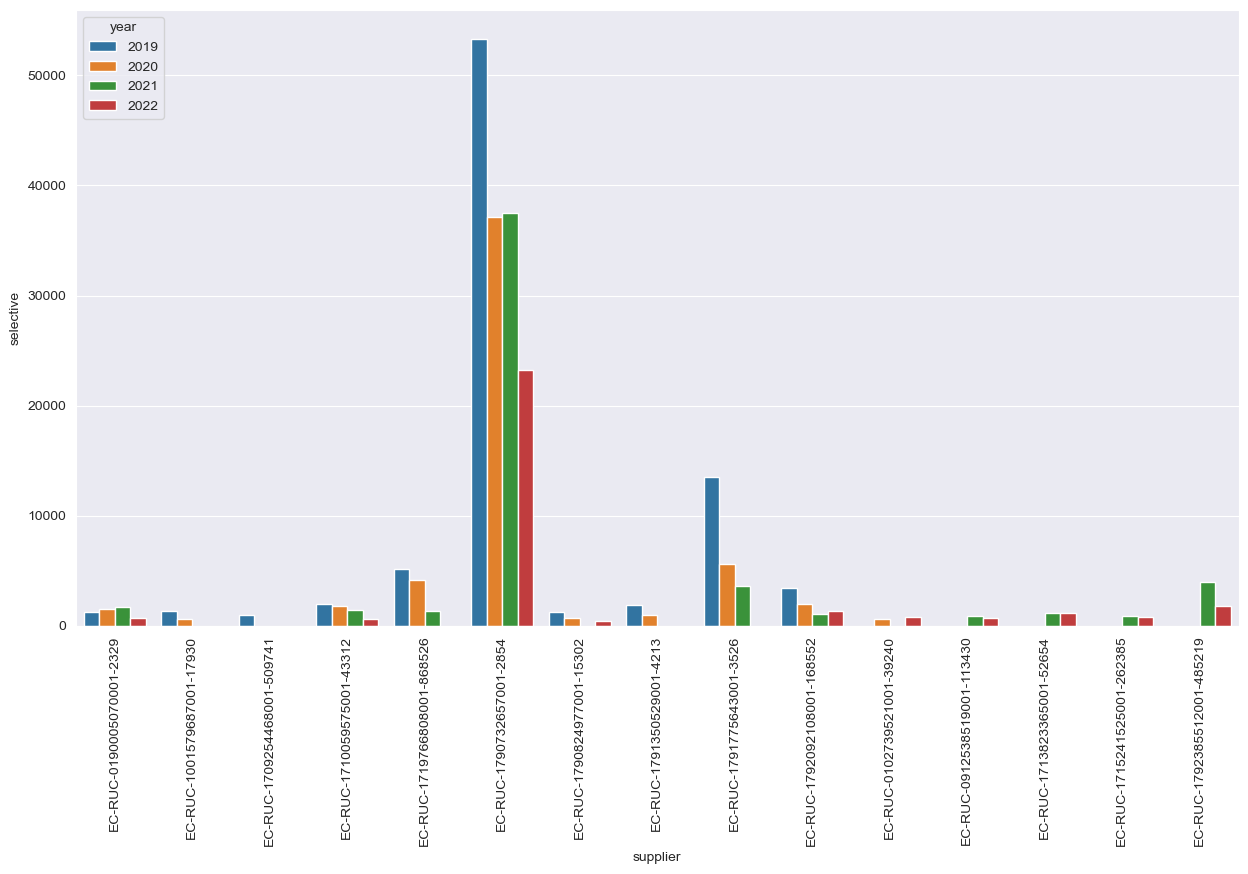

In [57]:
sbn.set_style("darkgrid")
fig,axs = plt.subplots(figsize=(15,8))
sbn.barplot(data= dfSelective, x="supplier", y = "selective", hue="year", ax= axs)
_=plt.setp(axs.get_xticklabels(), rotation=90)